In [63]:
import numpy as np  
import os  
import cv2   # opencv  
from PIL import Image   # PIL <==  pillow 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
cat_img_path = r"C:\Users\Ranjit\Desktop\3rd_july_datascience\CNN\Data\images\cats\cat_38.jpg"
cat = Image.open(cat_img_path)

In [4]:
type(cat)

PIL.JpegImagePlugin.JpegImageFile

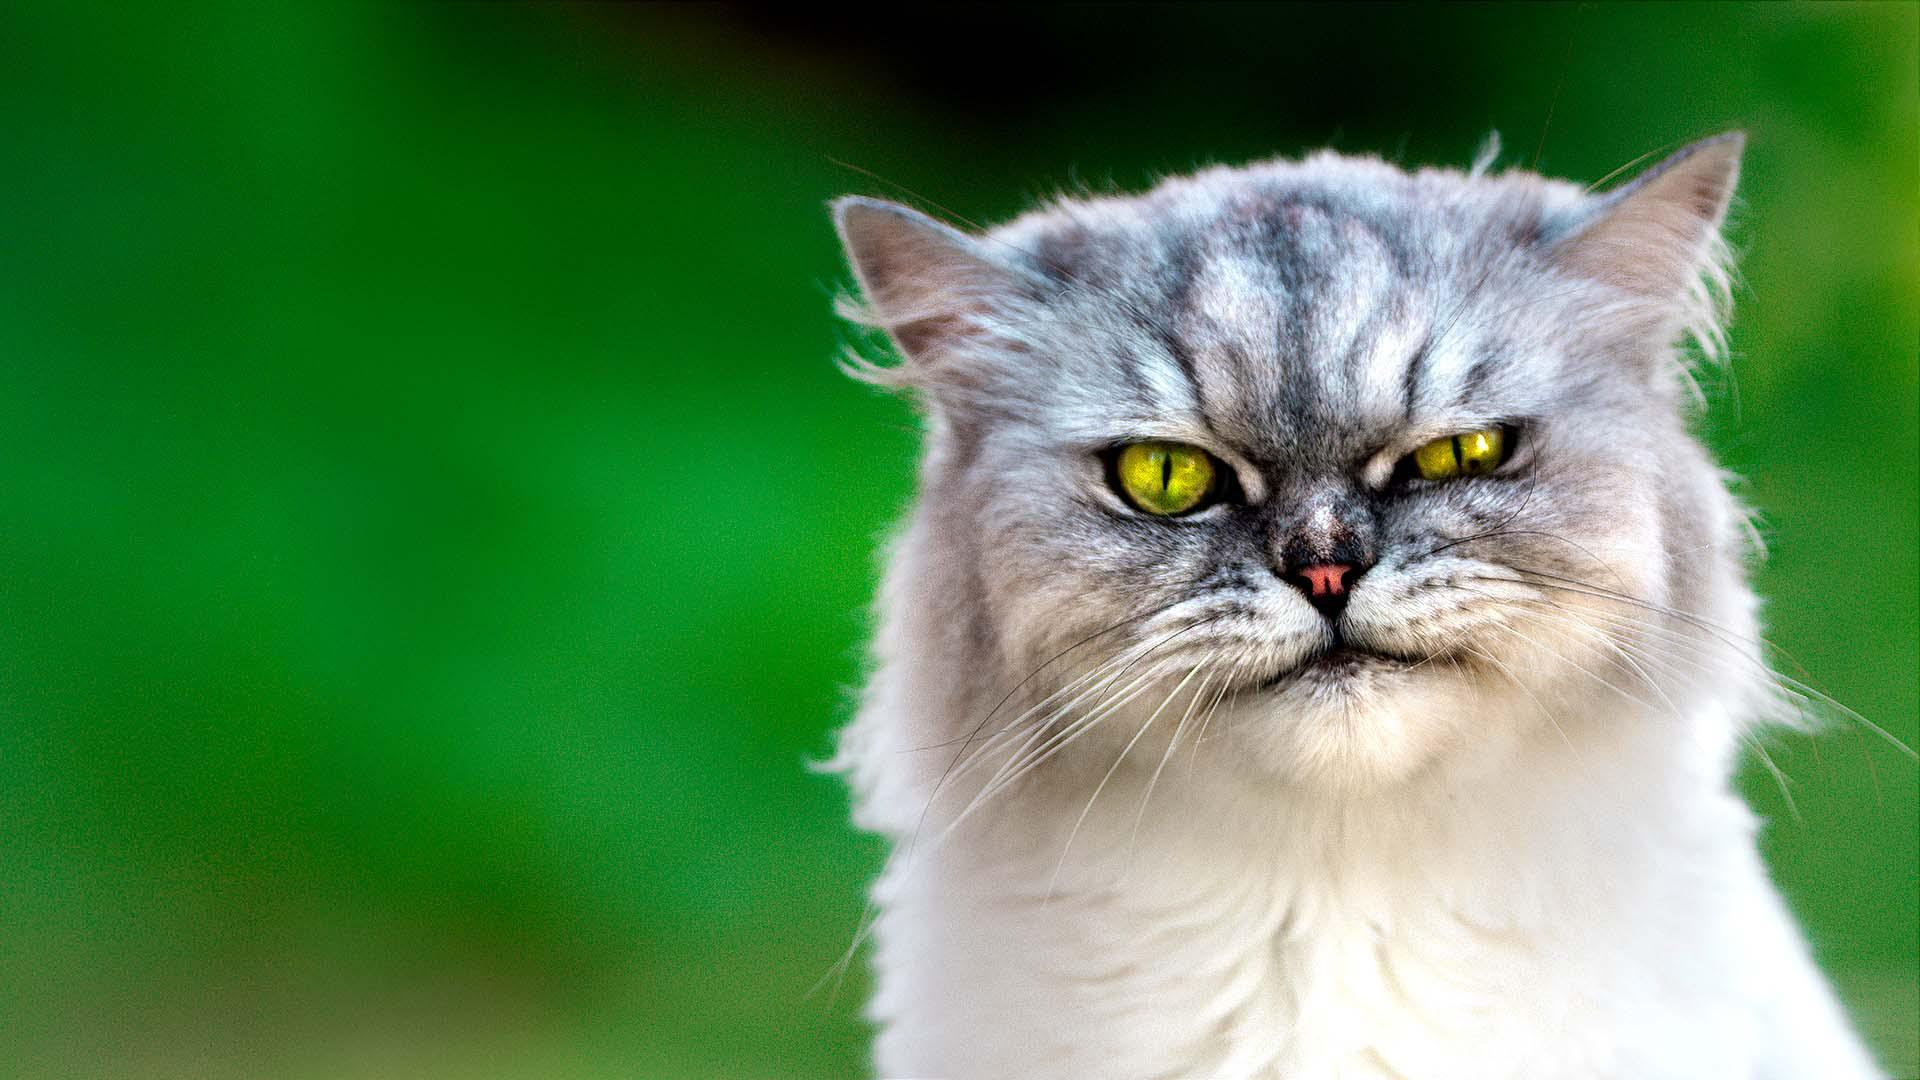

In [9]:
cat 

In [7]:
catINPixel_form = np.array(cat)  

In [10]:
catINPixel_form.shape 

# pixels values => 0 - 255 

(1080, 1920, 3)

In [11]:
catINPixel_form.ndim 

3

In [13]:
catINPixel_form.min() # 0   -   255 

0

In [44]:
len(path_dict['cats'])  # total images  349 

349

In [45]:
len(path_dict['dogs'])  # total images  349 


348

In [51]:
Path(path_dict['cats'][25])

WindowsPath('Data/images/cats/cat_137.jpg')

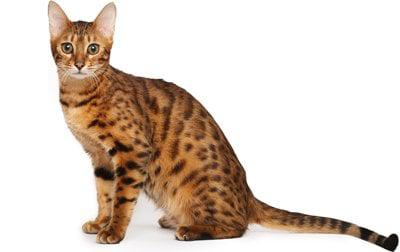

In [54]:
Image.open(path_dict['cats'][25])

In [7]:
from pathlib import Path
path_dict = {'cats':[],'dogs':[]}
base_directory = r"./Data/images"

for dir_name in os.listdir(base_directory):  # cats , dogs 
    dir_path = Path(os.path.join(base_directory,dir_name))
    print(dir_path)
    for image_name in os.listdir(dir_path):  
        # print(os.path.join(dir_path,image_name)) 
        path_dict[dir_name].append(os.path.join(str(dir_path),image_name))
        # path_dict[dir_path].append(os.path.join(dir_path,image_name))
        
        

Data\images\cats
Data\images\dogs


In [8]:
# path_dict = {'cats':[],'dogs':[]}
# base_directory = 'Data/images'
# from pathlib import Path
# # Iterate through the cat images directory
# cat_dir = os.path.join(base_directory, 'cats') 
# dog_dir = os.path.join(base_directory, 'dogs')

# for file in os.listdir(cat_dir):
#     file_path = os.path.join(cat_dir, file)
#     path_dict['cats'].append(Path(file_path))

# for file in os.listdir(dog_dir):
#     file_path = os.path.join(dog_dir, file)
#     path_dict['dogs'].append(Path(file_path))

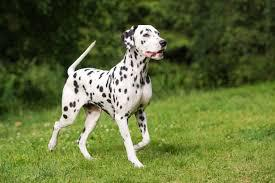

In [21]:
Image.open(path_dict['dogs'][20])

In [31]:
# path_dict 

In [29]:
x = []   # img in array after reduce the size 
y = []   # label 

sample_img = cv2.imread(path_dict['dogs'][256]) 
reduced_img = cv2.resize(sample_img,(224,224))
reduced_img.shape 

(224, 224, 3)

In [41]:
x = [] 
y = [] 
for class_name,paths in path_dict.items(): 
    for path in paths:  # [], [] 
        sample_img = cv2.imread(path) 
        reduced_img = cv2.resize(sample_img,(224,224))
        x.append(reduced_img) 
        y.append(class_name)        

In [42]:
len(x)   , len(y)

(697, 697)

In [45]:
set(y)  # {'cats':1, 'dogs':0}

{'cats', 'dogs'}

In [48]:
Y = []
for item in y: 
    if item == "cats":
        Y.append(1)
    else: 
        Y.append(0) 

In [77]:
Y = [1 if item == "cats" else 0 for item in y]

In [51]:
set(Y)

{0, 1}

In [57]:
type(Y)

list

In [80]:
X = np.array(x) 
Y = np.array(Y)

In [55]:
X.ndim 

4

In [59]:
type(X)   , type(Y)  

(numpy.ndarray, numpy.ndarray)

In [61]:
X.shape  

# 697 images  
# size  224 height , 224 width , 3channel (rgb) 

(697, 224, 224, 3)

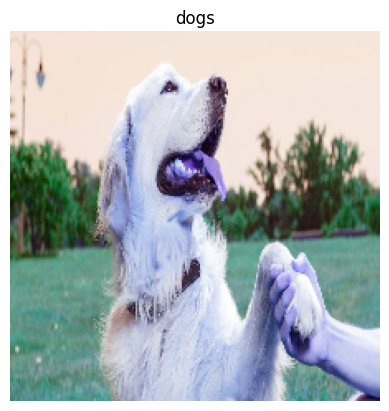

In [69]:
plt.imshow(X[455]) 
plt.title(y[455])
plt.axis('off')
plt.show() 

In [71]:
x[455].shape 

(224, 224, 3)

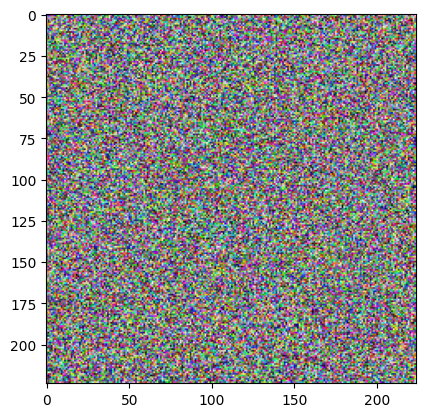

In [73]:
plt.imshow(np.random.randint(0,255,(224,224,3)))

In [83]:
# X 

In [84]:
# 0  -  255  ==> 0 - 1  
X = X/255.0   # minmax scaler 

In [ ]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler 

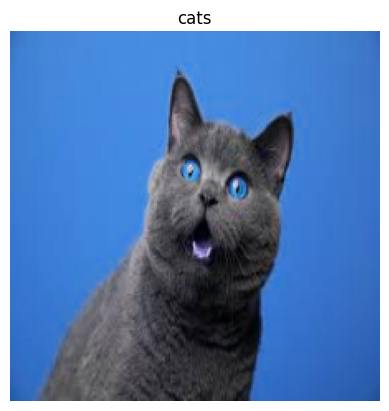

In [89]:
plt.imshow(x[255]) 
plt.title(y[255])
plt.axis('off')
plt.show() 

# pixel range 0 -- 255 

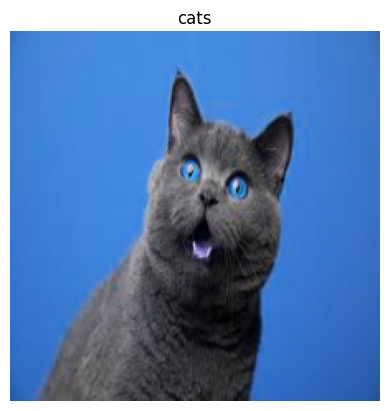

In [90]:
plt.imshow(X[255])   
plt.title(y[255])
plt.axis('off')
plt.show() 

# pixel range 0 -- 1 

In [93]:
##  training testing 
from sklearn.model_selection import  train_test_split 

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=42)

In [96]:
### Cnn model defining  
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Conv2D,  

In [97]:
x_train[0].shape 

(224, 224, 3)

In [98]:
cnn_model = Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(40, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(30, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(45, activation='relu'),
    layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary for a detailed overview
cnn_model.summary()

C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 40)        │          23,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 30)          │          10,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 81120)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 45)                  │       3,650,445 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           1,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,687,276 (14.07 MB)

 Trainable params: 3,687,276 (14.07 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
### Model training 
history = cnn_model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.5070 - loss: 1.1094 - val_accuracy: 0.5333 - val_loss: 0.6931
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.5306 - loss: 0.6936 - val_accuracy: 0.5619 - val_loss: 0.6917
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.5098 - loss: 0.6911 - val_accuracy: 0.5429 - val_loss: 0.6924
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6746 - loss: 0.6719 - val_accuracy: 0.6190 - val_loss: 0.6816
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7130 - loss: 0.5886 - val_accuracy: 0.6286 - val_loss: 0.6856


In [ ]:
# history dataframe 
# cnn_model.predict() 
# confusion_matrix()  
# classification report  
# model save

<Axes: >

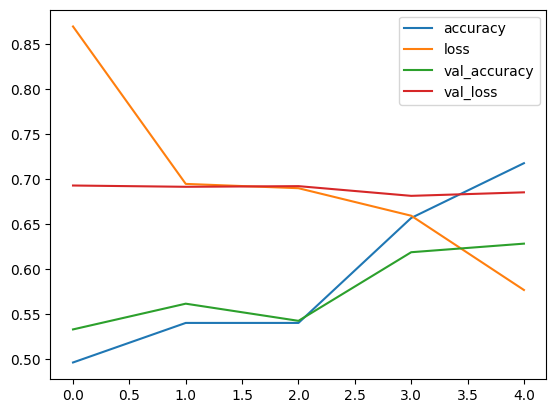

In [100]:
import pandas as pd 
pd.DataFrame(history.history).plot()

In [102]:
## prediction  
prediction = cnn_model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 420ms/step


In [105]:
prediction.shape   , x_test.shape 

((105, 1), (105, 224, 224, 3))

In [110]:
pred = (prediction >0.5).astype(int).ravel()

In [113]:
pred 

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [115]:
compare_df = pd.DataFrame({"Actual":y_test,"prediction":pred})
compare_df.head() 

Actual  prediction
0       1           0
1       0           1
2       0           0
3       1           1
4       1           1

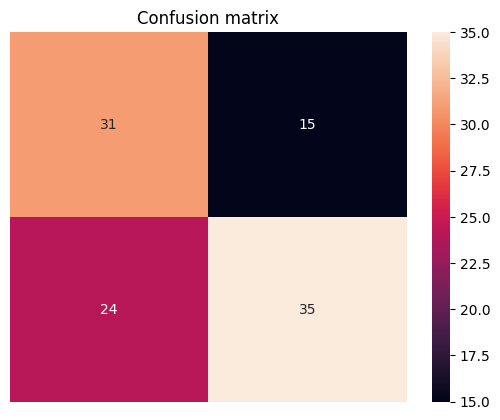


Classification report!
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        46
           1       0.70      0.59      0.64        59

    accuracy                           0.63       105
   macro avg       0.63      0.63      0.63       105
weighted avg       0.64      0.63      0.63       105



In [121]:
## confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report 
matrix = confusion_matrix(compare_df['Actual'],compare_df['prediction'])

sns.heatmap(matrix,annot=True , fmt='d') 
plt.title("Confusion matrix")
plt.axis('off')
plt.show() 


### classification report  
print()
print("Classification report!")
print(classification_report(compare_df['Actual'],compare_df['prediction']))

In [125]:
### saving the objects 
import os  
os.makedirs('prediction',exist_ok=True) 
os.makedirs('models',exist_ok=True) 
# compare_df['Actual'].map()

compare_df.to_csv('./prediction/predicted.csv',index=False) 
cnn_model.save('./models/cnn_model.h5') 
print("successfully saved your models! ")


successfully saved your models! 
